<a href="https://colab.research.google.com/github/lariskelmer/master-s-degree/blob/main/Vis%C3%A3o%20Computacional/CV02_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Agrupamento de Imagens

In [ ]:

from sklearn.cluster import KMeans
import numpy as np
import random
import cv2
from google.colab.patches import cv2_imshow

import imutils

# lista de cores
colors = [
	# shades of red, green, and blue
	(138, 8, 8), (180, 4, 4), (223, 1, 1), (255, 0, 0), (250, 88, 88),
	(8, 138, 8), (4, 180, 4), (1, 223, 1), (0, 255, 0), (46, 254, 46),
	(11, 11, 97), (8, 8, 138), (4, 4, 180), (0, 0, 255), (46, 46, 254)]
#  canvas
canvas = np.ones((400, 600, 3), dtype="uint8") * 255
# loop no canvas
for y in range(0, 400, 20):
	for x in range(0, 600, 20):
		# gera coordenada aleatoria (x, y), raio, e cor para o circulo
		(dX, dY) = np.random.randint(5, 10, size=(2,))
		r = np.random.randint(5, 8)
		color = random.choice(colors)[::-1]
		# desenha o circulo
		cv2.circle(canvas, (x + dX, y + dY), r, color, -1)
canvas = cv2.copyMakeBorder(canvas, 5, 5, 5, 5, cv2.BORDER_CONSTANT,
	value=(255, 255, 255))

In [ ]:
# converte a imagem para escala de cinza, binariza e detecta contornos
gray = cv2.cvtColor(canvas, cv2.COLOR_BGR2GRAY)
gray = cv2.bitwise_not(gray)
thresh = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)[1]
cnts = cv2.findContours(gray.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

data = []
# loop nos contornos
for c in cnts:
	# cria mascara a partir doa contornos
	mask = np.zeros(canvas.shape[:2], dtype="uint8")
	cv2.drawContours(mask, [c], -1, 255, -1)
	features = cv2.mean(canvas, mask=mask)[:3]
	data.append(features)

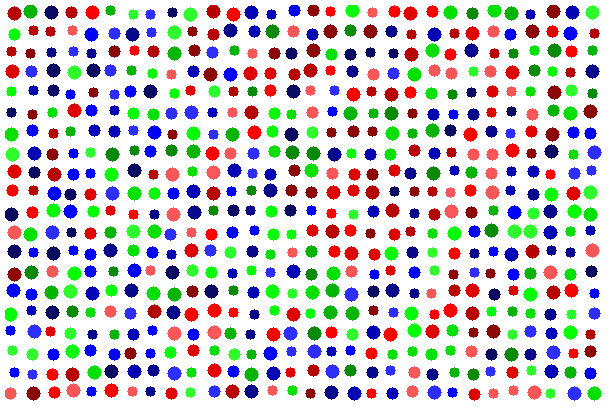

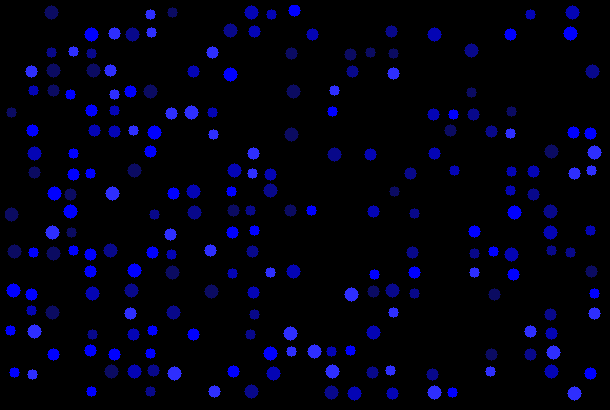

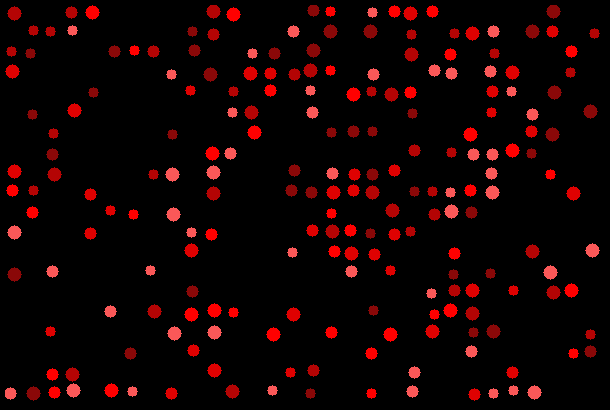

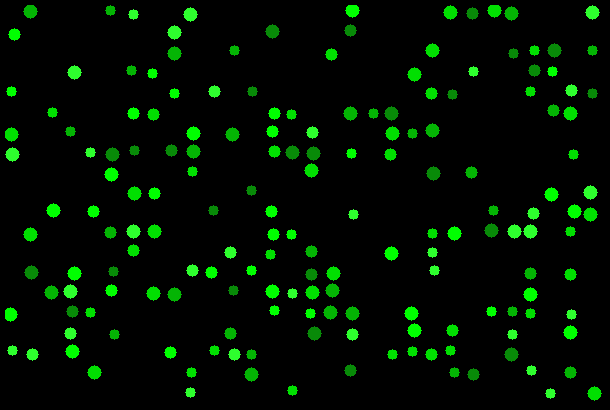

In [ ]:
# agrupa a partir das caracteristicas (cores)
clt = KMeans(n_clusters=3)
clt.fit(data)
cv2_imshow(canvas)
# passa por todos os grupos
for i in np.unique(clt.labels_):
	# cria a mascara do grupo atual
	mask = np.zeros(canvas.shape[:2], dtype="uint8")
	# loop nos indices dos clusters para desenhar cada um dos itens
	for j in np.where(clt.labels_ == i)[0]:
		cv2.drawContours(mask, [cnts[j]], -1, 255, -1)
	# mostra a imagem final
	cv2_imshow(cv2.bitwise_and(canvas, canvas, mask=mask))